In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
BASE_DIR = "/content/drive/MyDrive/Projects/Bird_Vs_drone"

TRAIN_DIR = f"{BASE_DIR}/train"
VAL_DIR   = f"{BASE_DIR}/valid"
TEST_DIR  = f"{BASE_DIR}/test"

TRAIN_DIR, VAL_DIR, TEST_DIR


('/content/drive/MyDrive/Projects/Bird_Vs_drone/train',
 '/content/drive/MyDrive/Projects/Bird_Vs_drone/valid',
 '/content/drive/MyDrive/Projects/Bird_Vs_drone/test')

In [ ]:
import os

for split in ["train", "valid", "test"]:
    split_path = os.path.join(BASE_DIR, split)
    print(f"\n📁 {split.upper()}")

    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        print(f" - {cls}: {len(os.listdir(cls_path))} images")



📁 TRAIN
 - bird: 1414 images
 - drone: 1248 images

📁 VALID
 - drone: 225 images
 - bird: 217 images

📁 TEST
 - bird: 121 images
 - drone: 94 images


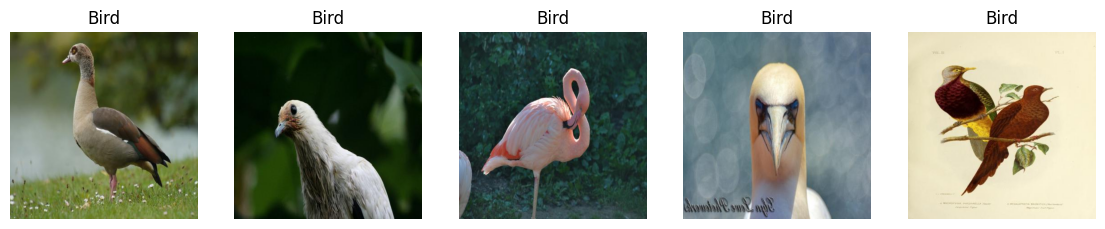

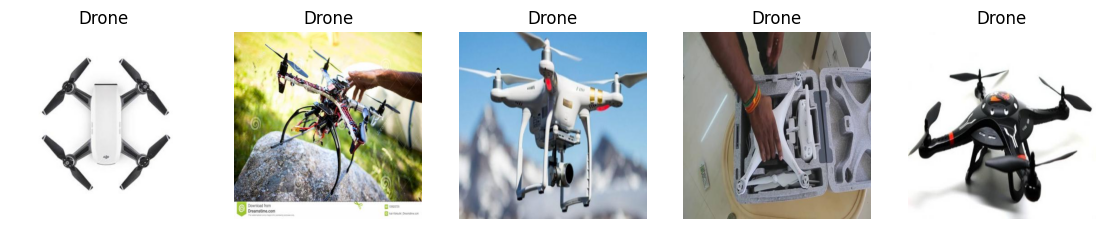

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def show_samples(folder, n=5):
    images = os.listdir(folder)
    sample_imgs = random.sample(images, n)

    plt.figure(figsize=(14, 4))

    for i, img in enumerate(sample_imgs):
        img_path = os.path.join(folder, img)
        image = Image.open(img_path)

        plt.subplot(1, n, i+1)
        plt.imshow(image)
        plt.axis("off")
        plt.title(folder.split("/")[-1].capitalize())

show_samples(os.path.join(TRAIN_DIR, "bird"))
show_samples(os.path.join(TRAIN_DIR, "drone"))


In [ ]:
import numpy as np

sample_path = os.path.join(TRAIN_DIR, "bird", random.choice(os.listdir(os.path.join(TRAIN_DIR, "bird"))))
sample = np.array(Image.open(sample_path))

print("Sample Image Shape:", sample.shape)


Sample Image Shape: (416, 416, 3)


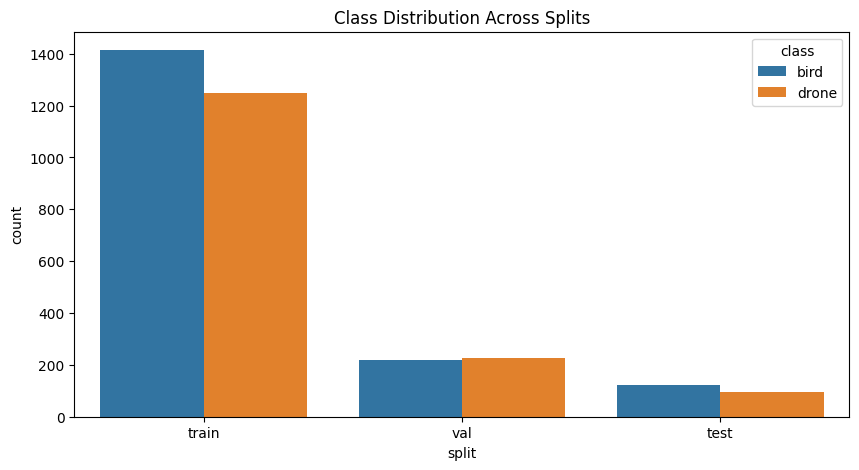

In [ ]:
import seaborn as sns
import pandas as pd

counts = {
    "bird_train": len(os.listdir(os.path.join(TRAIN_DIR, "bird"))),
    "drone_train": len(os.listdir(os.path.join(TRAIN_DIR, "drone"))),
    "bird_val": len(os.listdir(os.path.join(VAL_DIR, "bird"))),
    "drone_val": len(os.listdir(os.path.join(VAL_DIR, "drone"))),
    "bird_test": len(os.listdir(os.path.join(TEST_DIR, "bird"))),
    "drone_test": len(os.listdir(os.path.join(TEST_DIR, "drone"))),
}

df_counts = pd.DataFrame({
    "class": ["bird", "drone", "bird", "drone", "bird", "drone"],
    "split": ["train", "train", "val", "val", "test", "test"],
    "count": list(counts.values())
})

plt.figure(figsize=(10,5))
sns.barplot(data=df_counts, x="split", y="count", hue="class")
plt.title("Class Distribution Across Splits")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

test_loader = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

imgs, labels = next(test_loader)
print("Batch image shape:", imgs.shape)
print("Batch label shape:", labels.shape)


Found 2662 images belonging to 2 classes.
Batch image shape: (32, 224, 224, 3)
Batch label shape: (32,)


In [ ]:
from PIL import Image
import os

def find_corrupted_images(folder):
    corrupted = []
    for root, _, files in os.walk(folder):
        for f in files:
            try:
                Image.open(os.path.join(root, f)).verify()
            except:
                corrupted.append(os.path.join(root, f))
    return corrupted

corrupted_files = find_corrupted_images(BASE_DIR)

print("Corrupted images found:", len(corrupted_files))
corrupted_files[:5]


Corrupted images found: 0


[]

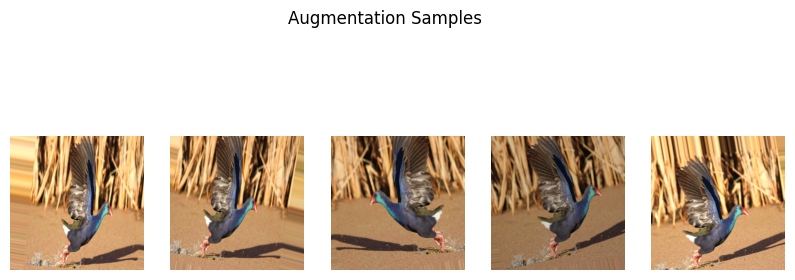

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

img_path = os.path.join(TRAIN_DIR, "bird", random.choice(os.listdir(os.path.join(TRAIN_DIR, "bird"))))
image = load_img(img_path)
image = img_to_array(image)
image = np.expand_dims(image, 0)

plt.figure(figsize=(10,4))
for i in range(5):
    batch = next(aug.flow(image, batch_size=1))
    plt.subplot(1,5,i+1)
    plt.imshow(batch[0]/255)
    plt.axis("off")
plt.suptitle("Augmentation Samples")
plt.show()


In [ ]:
import os

def folder_size(path):
    total = 0
    for root, _, files in os.walk(path):
        for f in files:
            total += os.path.getsize(os.path.join(root, f))
    return total / (1024*1024)  # MB

print(f"Total dataset size: {folder_size(BASE_DIR):.2f} MB")


Total dataset size: 76.29 MB


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary'
)

gen.class_indices


Found 2662 images belonging to 2 classes.


{'bird': 0, 'drone': 1}